# 1.Data Collection:
 Gather the datasets provided, including train.csv, test.csv, sample_submission.csv, stores.csv, oil.csv, and holidays_events.csv.

In [65]:
import pandas as pd
import numpy as np
import random

In [66]:
#Load Data
Raw_train=pd.read_csv('train.csv')
Raw_test=pd.read_csv('test.csv')
Raw_sample_submission=pd.read_csv('sample_submission.csv')
Raw_stores=pd.read_csv('stores.csv')
Raw_oil=pd.read_csv('oil.csv')
Raw_holidays=pd.read_csv('holidays_events.csv')

In [67]:
#Display the head and the first few rows for each dataset
print('train dataset : ')
Raw_train.head(5)

train dataset : 


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [68]:
print('test dataset: ')
Raw_test.head(5)

test dataset: 


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [69]:
print('sample submission dataset: ')
Raw_sample_submission.head(5)

sample submission dataset: 


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [70]:
print('sample oil dataset: ')
Raw_oil.head(5)

sample oil dataset: 


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [71]:
print('stores dataset: ')
Raw_stores.head(5)

stores dataset: 


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [72]:
print('stores holidays: ')
Raw_holidays.head(5)

stores holidays: 


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


# 2.Data Preprocessing:


a. Analyze the datasets and identify any missing or inconsistent values.

b. Handle missing data by imputing or dropping, depending on the proportion of missing values and their importance.

c. Merge relevant datasets, such as adding store metadata or holidays/events information to the main training and testing datasets.

d. Convert the date column to a datetime object and sort the data chronologically.

In [73]:
#d.Convert date column to datetime objects and sort it
Raw_train['date']=pd.to_datetime(Raw_train['date'])
Raw_train=Raw_train.sort_values(by='date')

Raw_test['date']=pd.to_datetime(Raw_test['date'])
Raw_test=Raw_test.sort_values(by='date')

Raw_oil['date']=pd.to_datetime(Raw_oil['date'])
Raw_oil=Raw_oil.sort_values(by='date')

Raw_holidays['date']=pd.to_datetime(Raw_holidays['date'])
Raw_holidays=Raw_holidays.sort_values(by='date')

In [74]:
#check datasets with null values
#print('train table')
#Raw_train.isna().any()

In [75]:
#print('test table')
#Raw_test.isna().any()


In [76]:
print('oil table')
Raw_oil.isna().any()


oil table


date          False
dcoilwtico     True
dtype: bool

In [77]:
#print('stores table')
#Raw_stores.isna().any()


In [78]:
#print('holidays table')
#Raw_holidays.isna().any()

In [79]:
#handle missing value in oil dataset, we used foward fill then backword fill to figure it out
Raw_oil.fillna(method='ffill',inplace=True)
Raw_oil.fillna(method='bfill',inplace=True)
Raw_oil.isna().any()

date          False
dcoilwtico    False
dtype: bool

In [80]:
# Merge relavant dataset
##merge train and test set with stores
Raw_train=pd.merge(Raw_train,Raw_stores,on='store_nbr',how='left')
Raw_test=pd.merge(Raw_test,Raw_stores,on='store_nbr',how='left')

##merge train and test set with oil
Raw_train=pd.merge(Raw_train,Raw_oil,on='date',how='left')
Raw_test=pd.merge(Raw_test,Raw_oil,on='date',how='left')

##merge train and test set with holidays
Raw_train=pd.merge(Raw_train,Raw_holidays,on='date',how='left')
Raw_test=pd.merge(Raw_test,Raw_holidays,on='date',how='left')

In [81]:
#check train and test datasets again
pre_train=Raw_train
pre_test=Raw_test
pre_train.head(5)


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1194,2013-01-01,42,CELEBRATION,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,1193,2013-01-01,42,BREAD/BAKERY,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,1192,2013-01-01,42,BOOKS,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,1191,2013-01-01,42,BEVERAGES,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [82]:
pre_test.head(5)

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN
1,3002082,2017-08-16,42,CELEBRATION,0,Cuenca,Azuay,D,2,46.8,NaN,NaN,NaN,NaN,NaN
2,3002081,2017-08-16,42,BREAD/BAKERY,12,Cuenca,Azuay,D,2,46.8,NaN,NaN,NaN,NaN,NaN
3,3002080,2017-08-16,42,BOOKS,0,Cuenca,Azuay,D,2,46.8,NaN,NaN,NaN,NaN,NaN
4,3002079,2017-08-16,42,BEVERAGES,19,Cuenca,Azuay,D,2,46.8,NaN,NaN,NaN,NaN,NaN


In [83]:
#check datasets with null values
pre_train.isna().any()

id             False
date           False
store_nbr      False
family         False
sales          False
onpromotion    False
city           False
state          False
type_x         False
cluster        False
dcoilwtico      True
type_y          True
locale          True
locale_name     True
description     True
transferred     True
dtype: bool

In [84]:
pre_test.isna().any()

id             False
date           False
store_nbr      False
family         False
onpromotion    False
city           False
state          False
type_x         False
cluster        False
dcoilwtico      True
type_y          True
locale          True
locale_name     True
description     True
transferred     True
dtype: bool

In [85]:
#handle missing value of dcoilwtico column in train and dataset, we used foward fill then backword fill to figure it out
pre_train['dcoilwtico'].fillna(method='ffill',inplace=True)
pre_train['dcoilwtico'].fillna(method='bfill',inplace=True)
pre_test['dcoilwtico'].fillna(method='ffill',inplace=True)
pre_test['dcoilwtico'].fillna(method='bfill',inplace=True)

In [86]:
pre_train[['type_y','locale','locale_name','description','transferred']]=pre_train[['type_y','locale','locale_name','description','transferred']].fillna('None')
pre_test[['type_y','locale','locale_name','description','transferred']]=pre_test[['type_y','locale','locale_name','description','transferred']].fillna('None')

In [87]:
#print Train dateset
pre_train.head(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1194,2013-01-01,42,CELEBRATION,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,1193,2013-01-01,42,BREAD/BAKERY,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,1192,2013-01-01,42,BOOKS,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,1191,2013-01-01,42,BEVERAGES,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
5,1190,2013-01-01,42,BEAUTY,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
6,1189,2013-01-01,42,BABY CARE,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
7,1188,2013-01-01,42,AUTOMOTIVE,0.0,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False
8,1187,2013-01-01,41,SEAFOOD,0.0,0,Machala,El Oro,D,4,93.14,Holiday,National,Ecuador,Primer dia del ano,False
9,1186,2013-01-01,41,SCHOOL AND OFFICE SUPPLIES,0.0,0,Machala,El Oro,D,4,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [88]:
#print Train dateset
pre_test.head(10)

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,None,None,None,None,None
1,3002082,2017-08-16,42,CELEBRATION,0,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
2,3002081,2017-08-16,42,BREAD/BAKERY,12,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
3,3002080,2017-08-16,42,BOOKS,0,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
4,3002079,2017-08-16,42,BEVERAGES,19,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
5,3002078,2017-08-16,42,BEAUTY,2,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
6,3002077,2017-08-16,42,BABY CARE,0,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
7,3002076,2017-08-16,42,AUTOMOTIVE,0,Cuenca,Azuay,D,2,46.8,None,None,None,None,None
8,3002075,2017-08-16,41,SEAFOOD,0,Machala,El Oro,D,4,46.8,None,None,None,None,None
9,3002074,2017-08-16,41,SCHOOL AND OFFICE SUPPLIES,13,Machala,El Oro,D,4,46.8,None,None,None,None,None


 
# 3. **Feature Engineering**:

a. Extract valuable information from the date column, such as day of the week, month, and year.

b. Create lag features to account for temporal dependencies in the data.

c. Generate aggregated features, such as the average sales per store, product family, or cluster.

d. Encode categorical variables, like product family or store type, using techniques like one-hot encoding or target encoding.

In [89]:
#Split the date column  into day of  the week and month
pre_train['day_of_week']=pre_train['date'].dt.dayofweek
pre_train['month']=pre_train['date'].dt.month
pre_train['year']=pre_train['date'].dt.year

In [90]:
pre_test['day_of_week']=pre_test['date'].dt.dayofweek
pre_test['month']=pre_test['date'].dt.month
pre_test['year']=pre_test['date'].dt.year

In [91]:
#Create lag features to account for temporal dependencies in the data.
lags=[1,4,7,14]
for lag in lags:
    pre_train[f'lag_{lag}_sales']=pre_train.groupby(['store_nbr','family'])['sales'].shift(lag)
    pre_test=pd.merge(pre_test,pre_train[['store_nbr', 'family', 'date', f"lag_{lag}_sales"]],on=['store_nbr', 'family', 'date'],how='left')

In [92]:
# Create agg features
pre_train['mean_sales_store_family']=pre_train.groupby(['store_nbr','family'])['sales'].transform('mean')
mean_sales_store_family=pre_train[['store_nbr','family','mean_sales_store_family']].drop_duplicates()
pre_test=pd.merge(pre_test,mean_sales_store_family,on=['store_nbr','family'],how='left')

pre_train['mean_sales_cluster']=pre_train.groupby(['cluster'])['sales'].transform('mean')
mean_sales_cluster=pre_train[['cluster','mean_sales_cluster']].drop_duplicates()
pre_test=pd.merge(pre_test,mean_sales_cluster,on=['cluster'],how='left')

In [93]:
#Encode categorical variable
pre_train = pre_train.drop('description', axis=1)
pre_test = pre_test.drop('description', axis=1)
pre_train=pd.get_dummies(pre_train,columns=['city','state','type_x','type_y','locale','locale_name','transferred'],drop_first=True)
pre_test=pd.get_dummies(pre_test,columns=['city','state','type_x','type_y','locale','locale_name','transferred'],drop_first=True)

In [94]:
# Align train and test DataFrames to have the same columns
Ext_train, Ext_test = pre_train.align(pre_test, join='outer', axis=1, fill_value=0)



In [95]:
Ext_train.sales

0            0.000
1            0.000
2            0.000
3            0.000
4            0.000
            ...   
3054343      3.000
3054344     93.000
3054345    180.107
3054346      0.000
3054347     16.000
Name: sales, Length: 3054348, dtype: float64

In [96]:
Ext_test.head()

,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,...,type_x_C,type_x_D,type_x_E,type_y_Bridge,type_y_Event,type_y_Holiday,type_y_None,type_y_Transfer,type_y_Work Day,year
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2017
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2017
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2017
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2017
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2017


# 4.Model Selection: 

Choose appropriate time-series forecasting models for the task, such as ARIMA, SARIMA, Exponential Smoothing State Space Model (ETS), Long Short-Term Memory (LSTM) neural networks, or Facebook's Prophet.

# 5.Model Evaluation: 

Compare the performance of the different models and select the best one based on the RMSLE scores.

# 6.Model Fine-tuning: 
Fine-tune the chosen model's hyperparameters, if necessary, to optimize its performance further.

In [97]:
#import packages for TS model
import lightgbm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

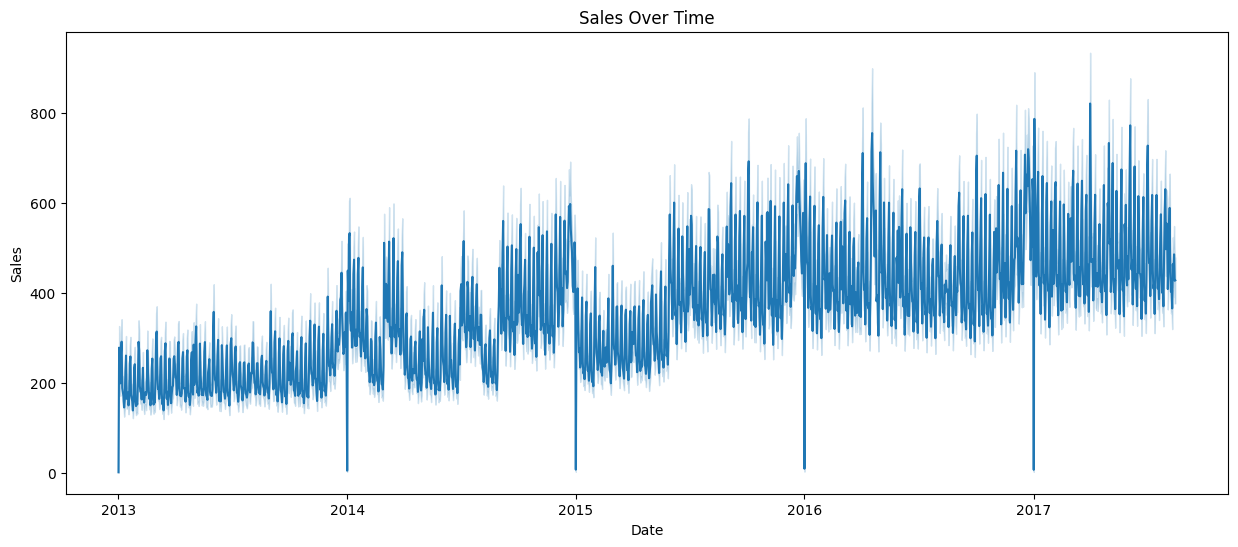

In [98]:
#EDA for the data set
plt.figure(figsize=(15,6))
sns.lineplot(x='date', y='sales', data=Ext_train)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

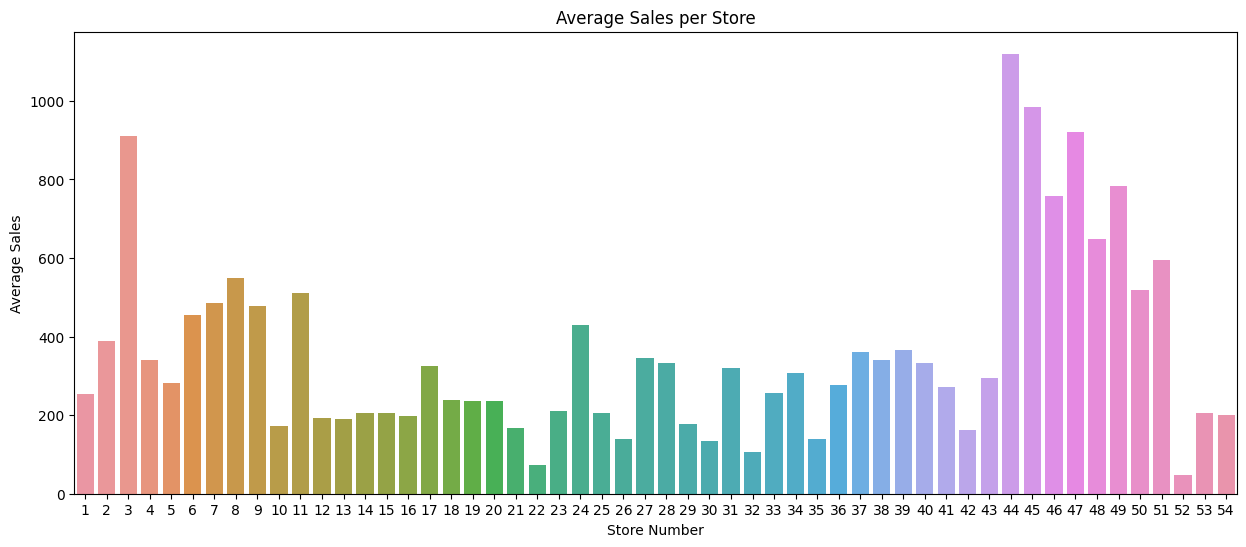

In [99]:
# Plot the average sales per store
avg_sales_per_store = Ext_train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='store_nbr', y='sales', data=avg_sales_per_store)
plt.title('Average Sales per Store')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.show()

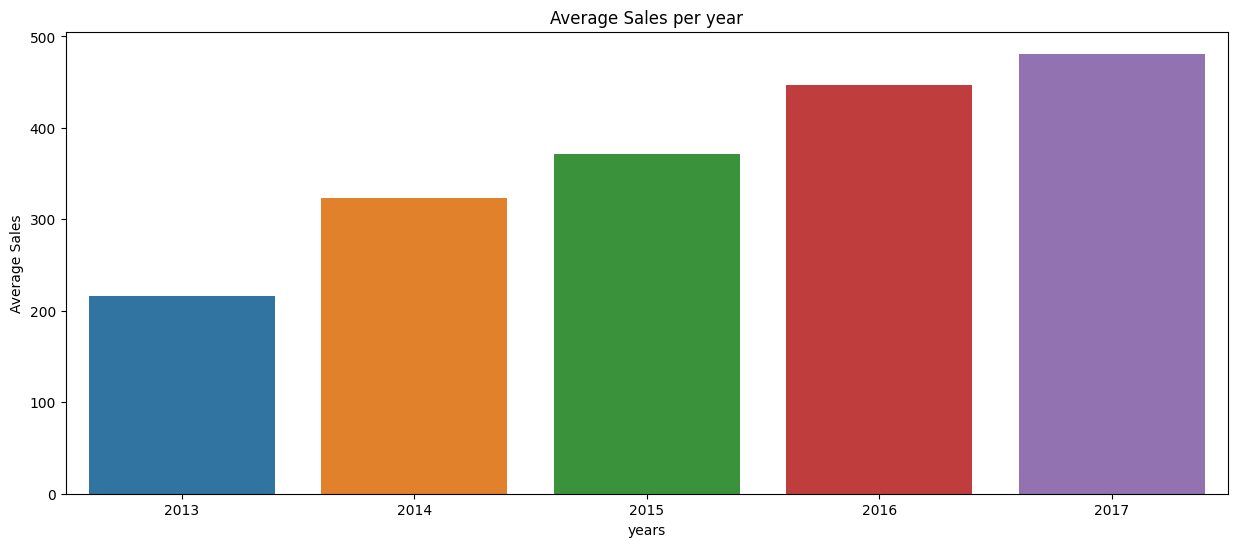

In [100]:
# Plot the average sales per year
avg_sales_per_year = Ext_train.groupby('year')['sales'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='year', y='sales', data=avg_sales_per_year)
plt.title('Average Sales per year')
plt.xlabel('years')
plt.ylabel('Average Sales')
plt.show()

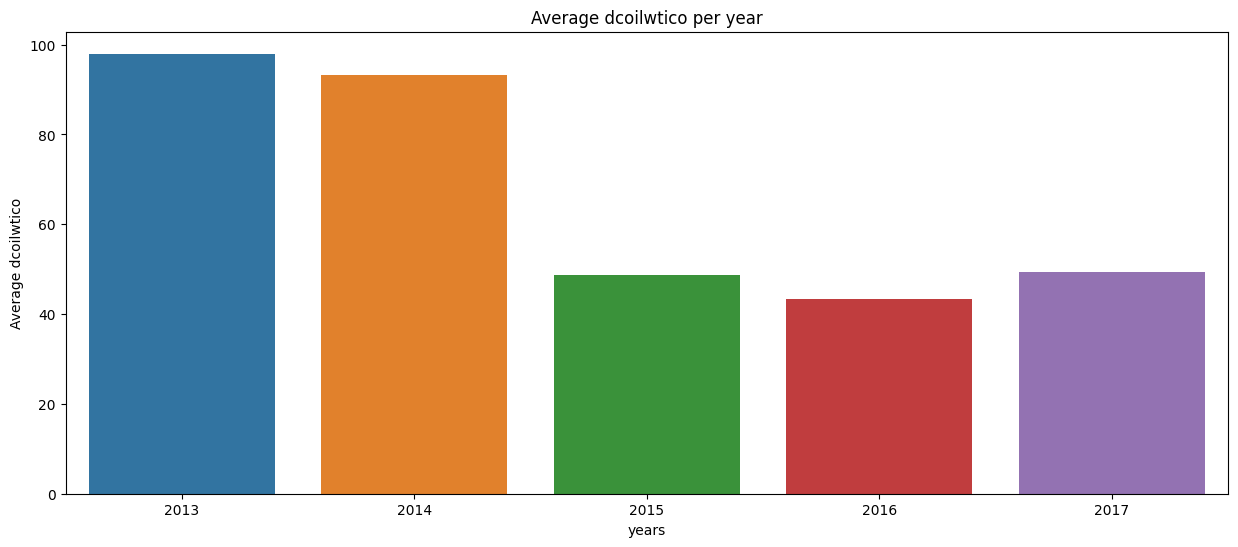

In [101]:
# Plot the average dcoilwtico per year
avg_dcoilwtico_per_year = Ext_train.groupby('year')['dcoilwtico'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='year', y='dcoilwtico', data=avg_dcoilwtico_per_year)
plt.title('Average dcoilwtico per year')
plt.xlabel('years')
plt.ylabel('Average dcoilwtico')
plt.show()

In [102]:
#replace or remove the special characters from the feature names
import re

def clean_feature_names(df):
    """
    Remove or replace special characters from DataFrame column names.
    """
    cleaned_columns = {}
    for column in df.columns:
        cleaned_column = re.sub(r'[^\w\s]', '', column)  # Remove special characters
        cleaned_column = re.sub(r'\s+', '_', cleaned_column)  # Replace whitespace with underscores
        cleaned_columns[column] = cleaned_column

    return df.rename(columns=cleaned_columns)

# Clean the feature names in train_df and test_df
Ext_train = clean_feature_names(Ext_train)
Ext_test = clean_feature_names(Ext_test)

In [103]:
Ext_train=Ext_train.sort_values(by='date')

In [104]:
# Calculate the index for the 80% split
split_index = int(len(Ext_train) * 0.8)
train_Ext_train=Ext_train[:split_index]
val_Ext_train=Ext_train[split_index:]



In [109]:
# Create a Lightgbm Model for forecast
## Split Ext_train to X and y
X_train=train_Ext_train.drop(['date','sales','id','family'],axis=1)
X_val=val_Ext_train.drop(['date','sales','id','family'],axis=1)
y_train=train_Ext_train['sales']
y_val=val_Ext_train['sales']

In [154]:
X_sub=Ext_test.drop(['date','sales','id','family'],axis=1)

In [111]:
#Create a new Dataset for LIGHTGBM
train_data=lgb.Dataset(X_train,label=y_train)
val_data=lgb.Dataset(X_val,label=y_val)

In [113]:
# Define the LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42,
    'verbosity': -1
}

In [114]:
#Train the lightGBM model
model1 = lgb.train(params, train_data, valid_sets=val_data, num_boost_round=2000, early_stopping_rounds=100, verbose_eval=100)


/Users/limuqing/opt/anaconda3/envs/ANLY590/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/limuqing/opt/anaconda3/envs/ANLY590/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 336.427
[200]	valid_0's rmse: 333.652
Early stopping, best iteration is:
[176]	valid_0's rmse: 332.255


In [115]:
#make prediction on the validation set
y_pred_val=model1.predict(X_val)

In [116]:
#Calculate the RMSLE 
y_pred_val_clipped = np.maximum(y_pred_val, 0.1)

rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_val_clipped))
print(f"Validation RMSLE: {rmsle}")

Validation RMSLE: 0.7563369841301197


<AxesSubplot:>

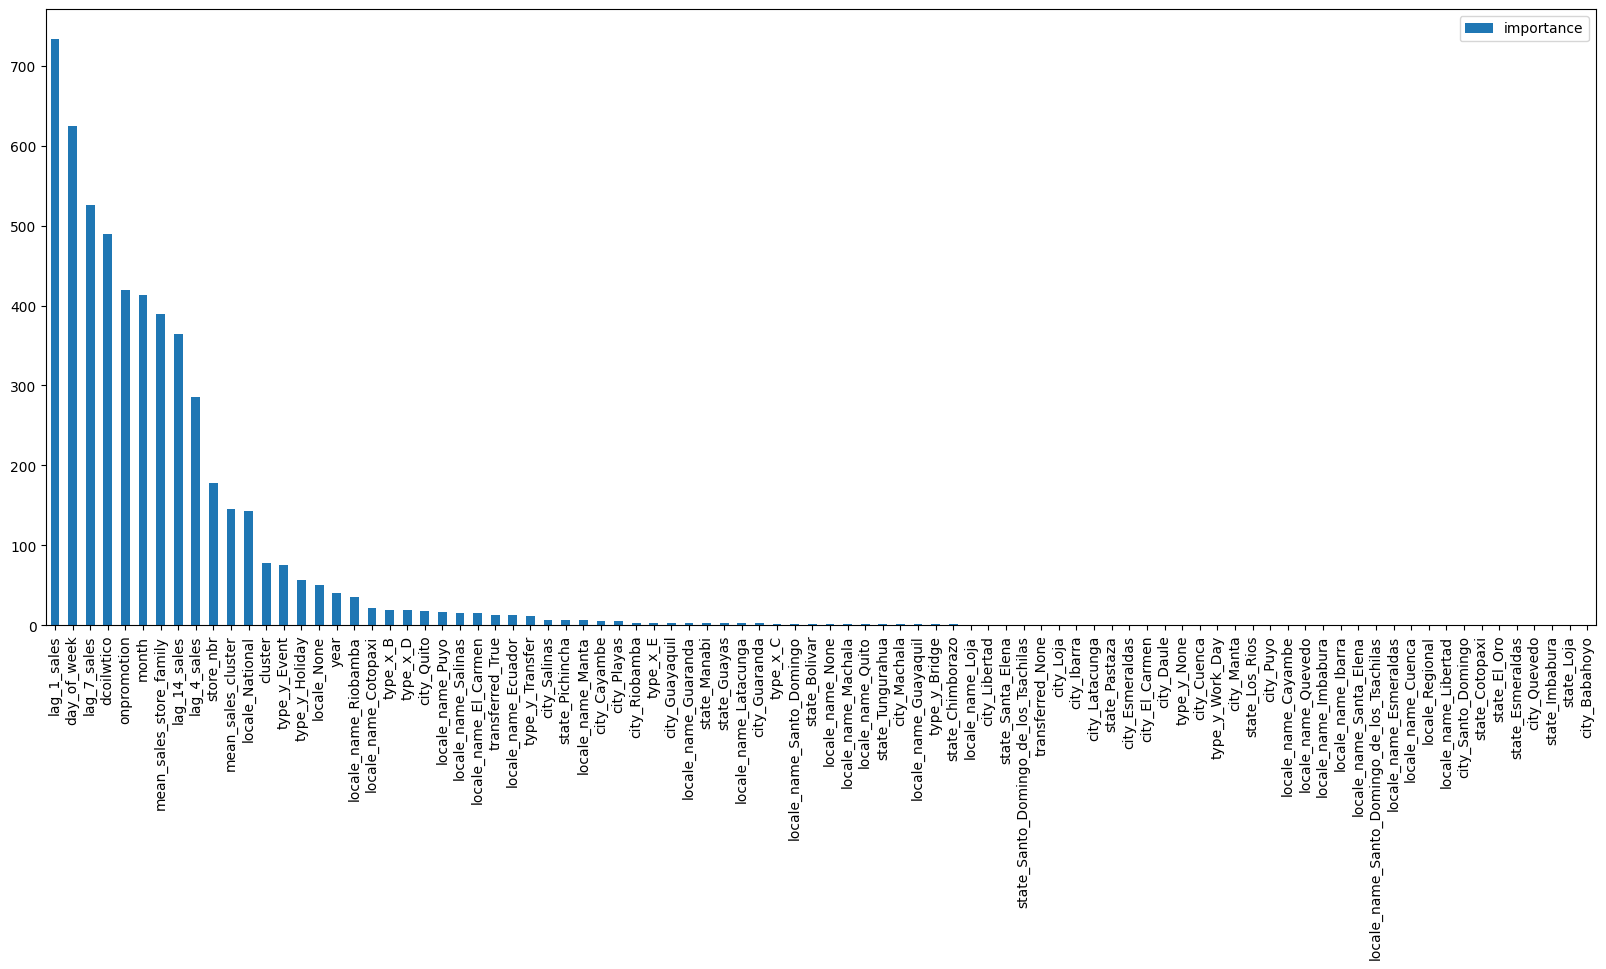

In [117]:
#Check the importance of model1
importance = pd.DataFrame(model1.feature_importance(), index=X_train.columns, columns=['importance'])

# plt.figure()
importance.sort_values(by='importance', ascending=False).plot.bar(figsize=(20, 8))

In [118]:
#XGBOOST
pre_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 92 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   id                                          int64         
 1   date                                        datetime64[ns]
 2   store_nbr                                   int64         
 3   family                                      object        
 4   sales                                       float64       
 5   onpromotion                                 int64         
 6   cluster                                     int64         
 7   dcoilwtico                                  float64       
 8   day_of_week                                 int64         
 9   month                                       int64         
 10  year                                        int64         
 11  lag_1_sales                                 float6

In [122]:
#import xgboost packages
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# XGBoost model
model2 = xgb.XGBRegressor(objective="reg:squarederror",
                          n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3,
                          random_state=42)

In [123]:
# Train the model
model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [124]:
# Make predictions on the test set
y_pred_test = model2.predict(X_val)


In [125]:
#Calculate the RMSLE 
y_pred_test_clipped = np.maximum(y_pred_test, 0.1)

rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_test_clipped))
print(f"Validation RMSLE: {rmsle}")

Validation RMSLE: 1.0065350689660728


In [143]:
# Visualization of data splitting
val_Ext_train['lightgbm']=y_pred_val_clipped
val_Ext_train['xgboost']=y_pred_test_clipped

/var/folders/k4/s8f00krn1f70p5gvf3wgc2tr0000gn/T/ipykernel_40370/2122547259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_Ext_train['lightgbm']=y_pred_val_clipped
/var/folders/k4/s8f00krn1f70p5gvf3wgc2tr0000gn/T/ipykernel_40370/2122547259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_Ext_train['xgboost']=y_pred_test_clipped


In [145]:
pred_df=val_Ext_train[['date','id','family','store_nbr','sales','lightgbm','xgboost']]

In [146]:
def plot_results (store_nbr, family):
    fig, ax = plt.subplots(figsize=(15,8))
    pred_df[(pred_df['store_nbr']==store_nbr)&(pred_df['family']==family)]['lightgbm'].plot(ax=ax, label='LGB prediction')
    pred_df[(pred_df['store_nbr']==store_nbr)&(pred_df['family']==family)]['xgboost'].plot(ax=ax, label='XGB prediction')
    pred_df[(pred_df['store_nbr']==store_nbr)&(pred_df['family']==family)]['sales'].plot(ax=ax, label='True value')
    ax.legend(['LGB prediction','XGB prediction','True value' ])
    plt.show()

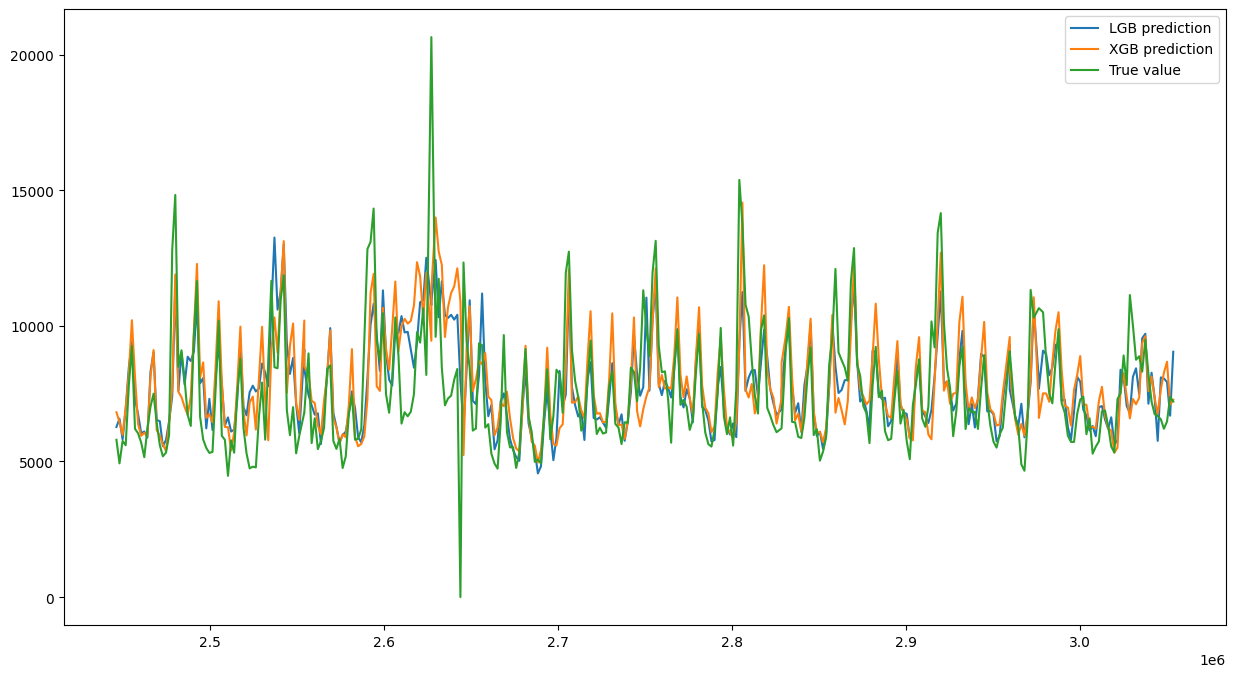

In [147]:
plot_results(11, 'GROCERY I')

In [152]:
x_name=['xgboost', 'xgboost', 'lightgbm']
y_name=['lightgbm', 'sales', 'sales']

def plot_xgb_vs_lgb (store_nbr, family):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
    for x_n, y_n, ax in zip(x_name, y_name, axs.flatten()):
        sns.scatterplot(
            x=pred_df[
                (pred_df['store_nbr']==store_nbr)&
                (pred_df['family']==family)][x_n],
            y=pred_df[
                (pred_df['store_nbr']==store_nbr)&
                (pred_df['family']==family)][y_n], 
            data=pred_df, 
            ax=ax
        )
        ax.axline((0, 0), slope=1, color='red')
            
    plt.tight_layout()

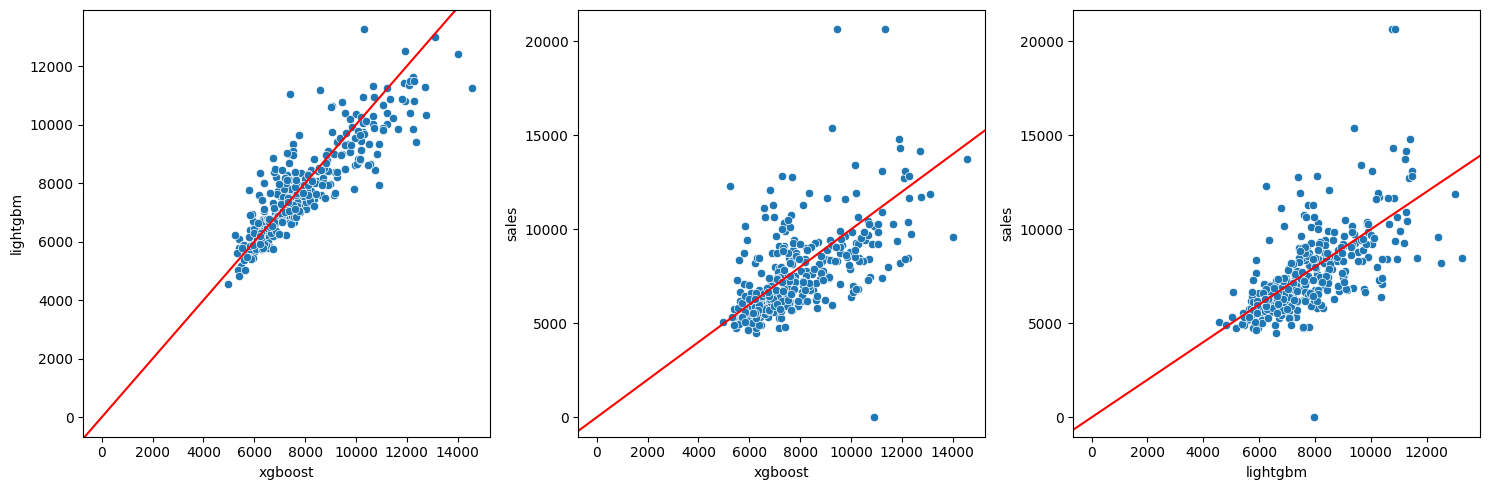

In [153]:
plot_xgb_vs_lgb(11, 'GROCERY I')

# 8.Forecasting: 
Use the chosen model to predict sales for the test dataset.

In [155]:
y_sub=model1.predict(X_sub)

In [160]:
y_sub_clipped = np.maximum(y_sub, 0.1)

In [161]:
Raw_test['sales']=y_sub_clipped

In [162]:
df_sub=Raw_test[['id','sales']]

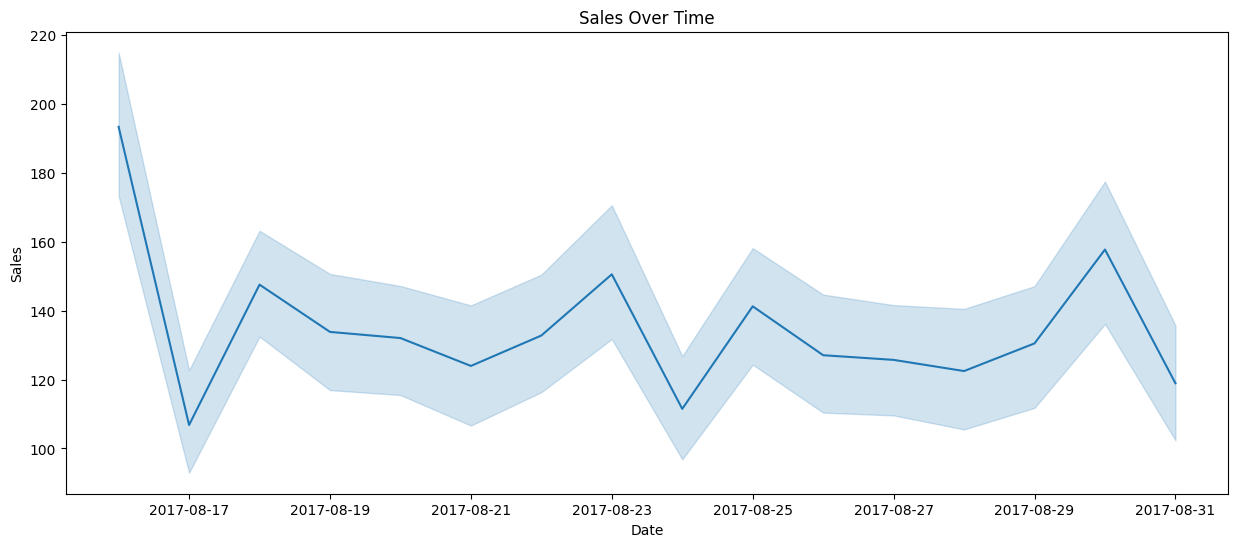

In [163]:
#EDA for the data set
plt.figure(figsize=(15,6))
sns.lineplot(x='date', y='sales', data=Raw_test)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# 9.Submission:  
Prepare a submission file following the required format, with the 'id' column and the predicted 'sales' values.

In [164]:
df_sub=Raw_test
df_sub.to_csv('submission.csv')


# 10.Documentation: 
Document the entire process, including data preprocessing, feature engineering, model selection, training, evaluation, and submission.